In [11]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [ ]:
data = {}
with open("rl-run-data.json", "w") as f:
    data = json.load(f)

In [28]:
max_epsilon = 0
min_epsilon = np.inf
map_name = list(data.keys())[0]
for i in range(len(data[map_name])):
        epsilon = data[map_name][i]["info"]["epsilon"]
        max_epsilon = max(max_epsilon, epsilon)
        min_epsilon = min(min_epsilon, epsilon)

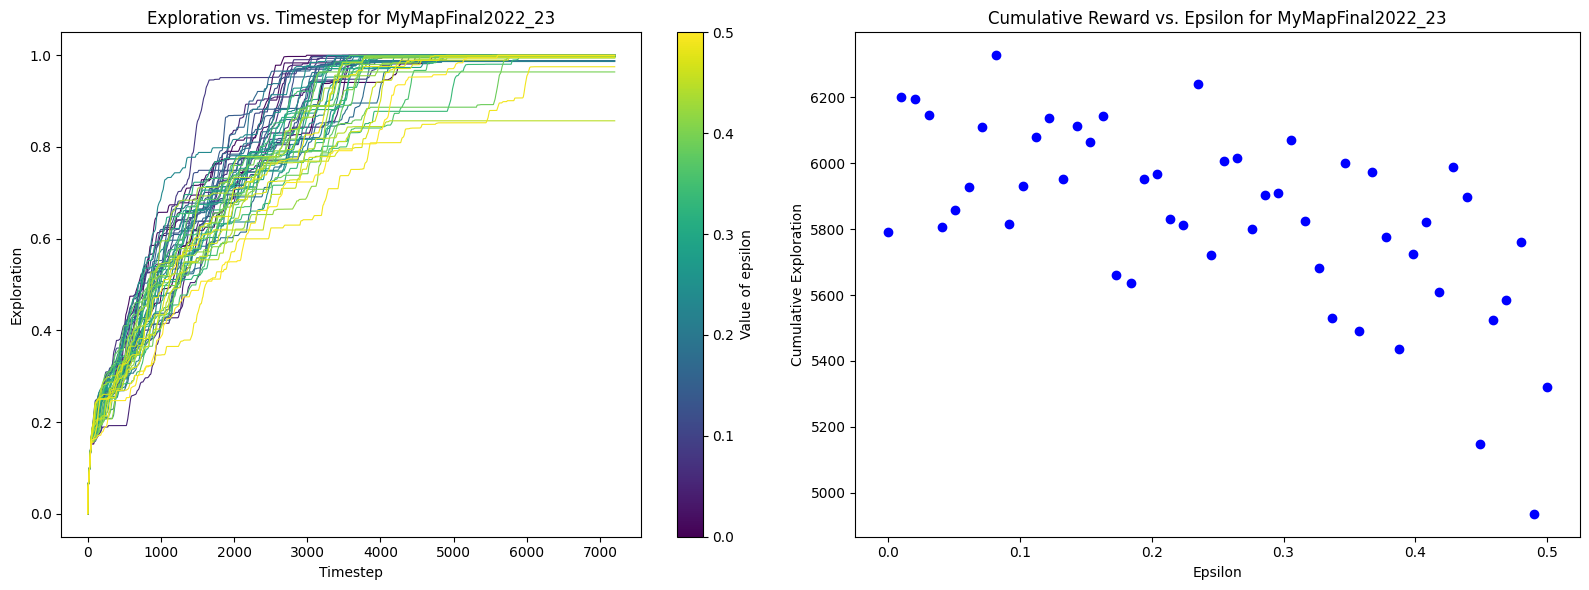

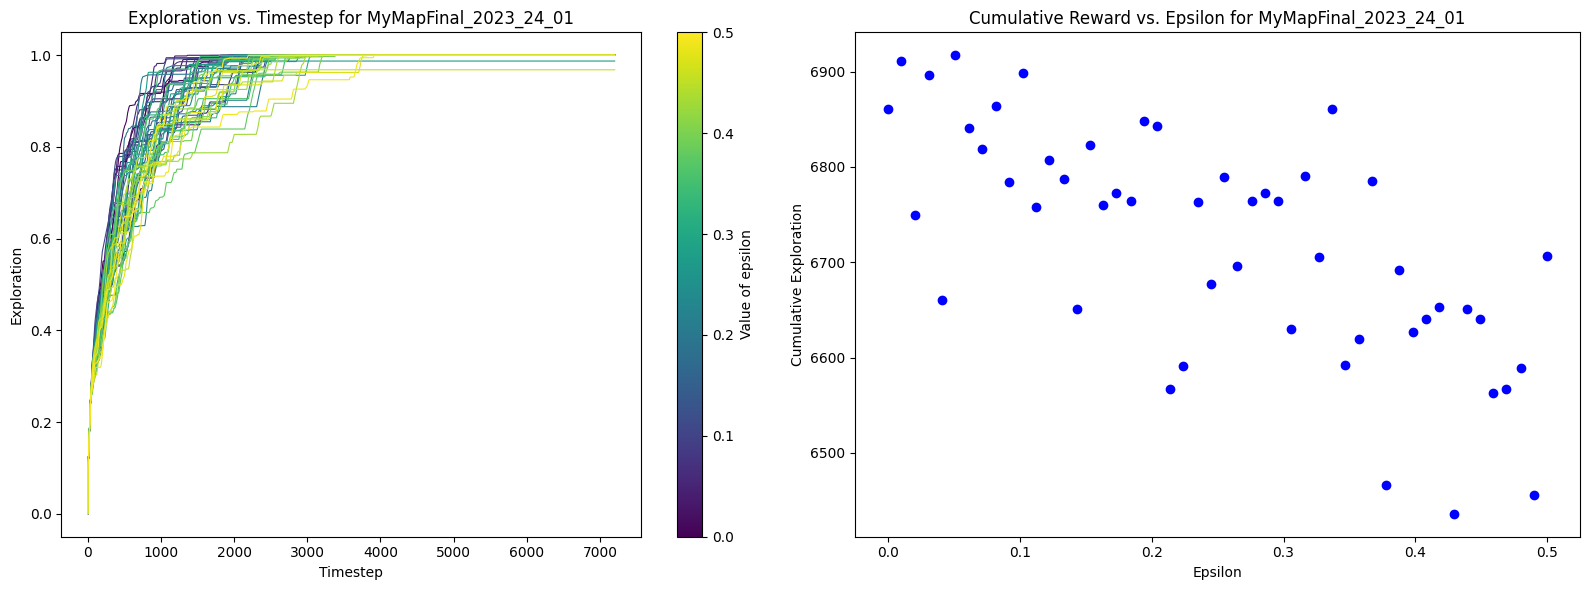

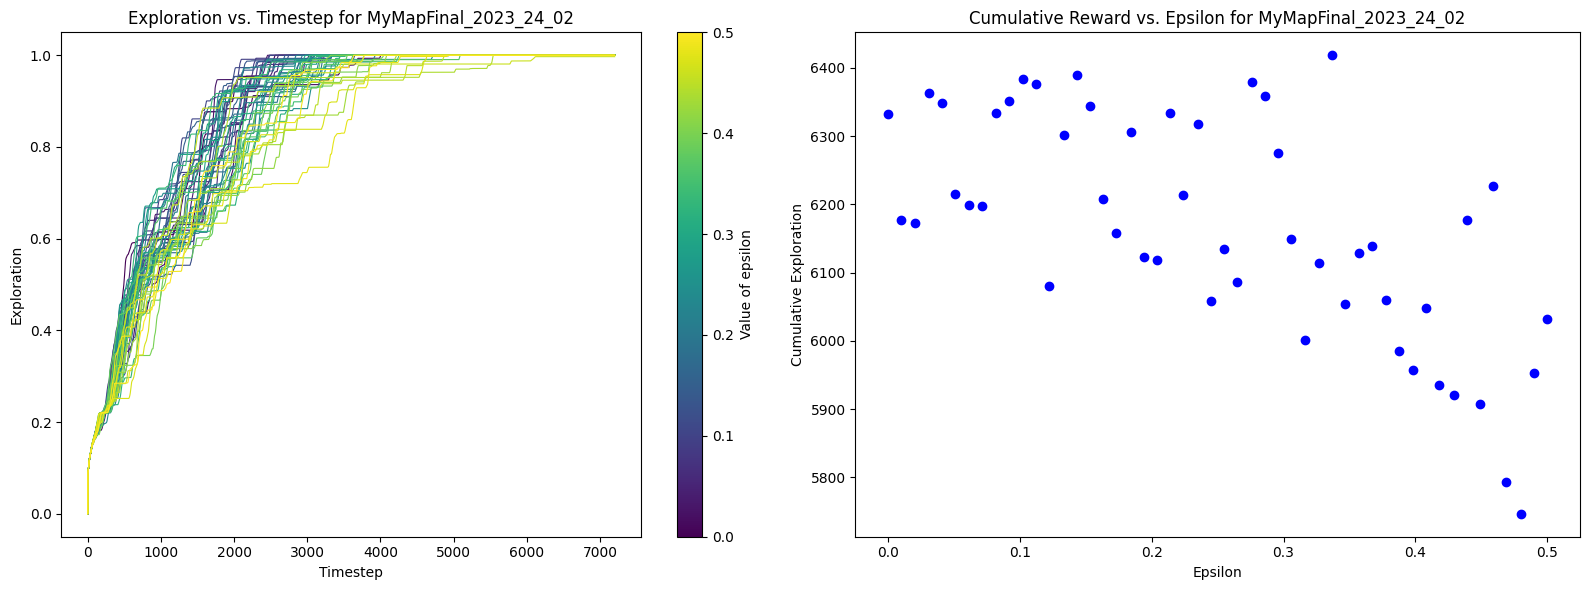

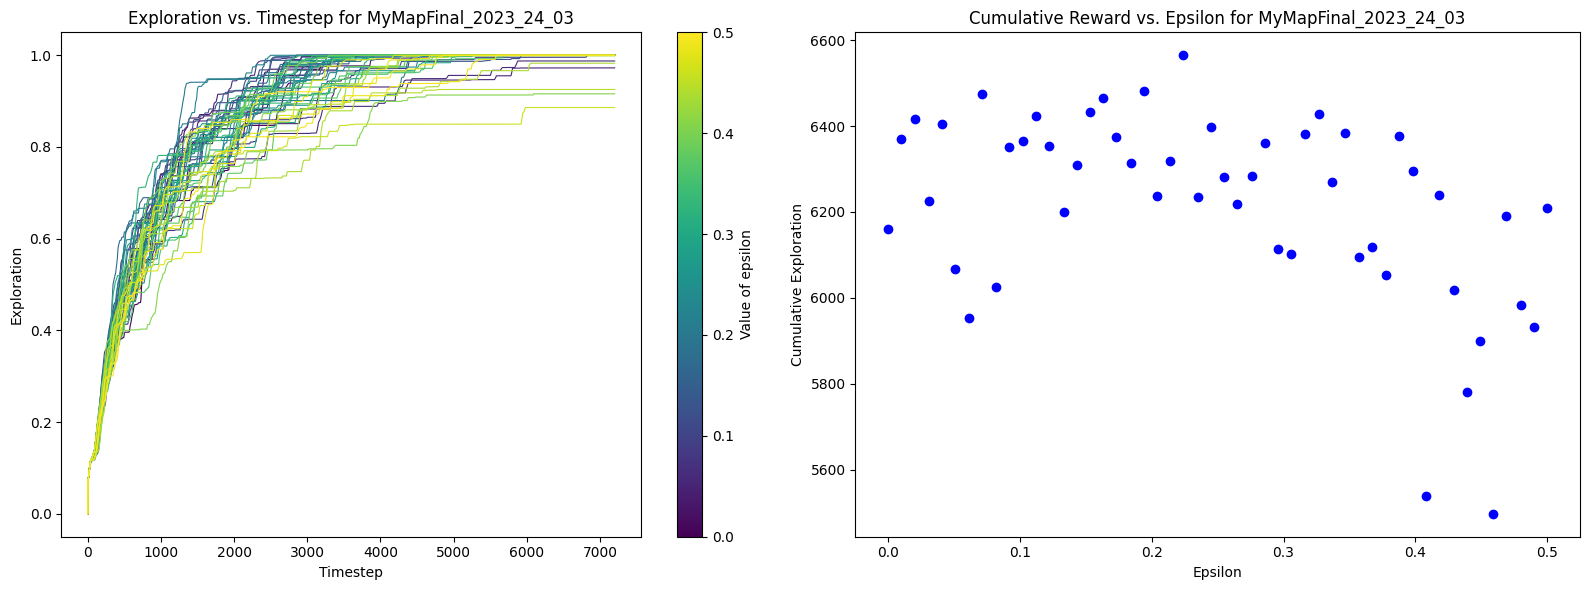

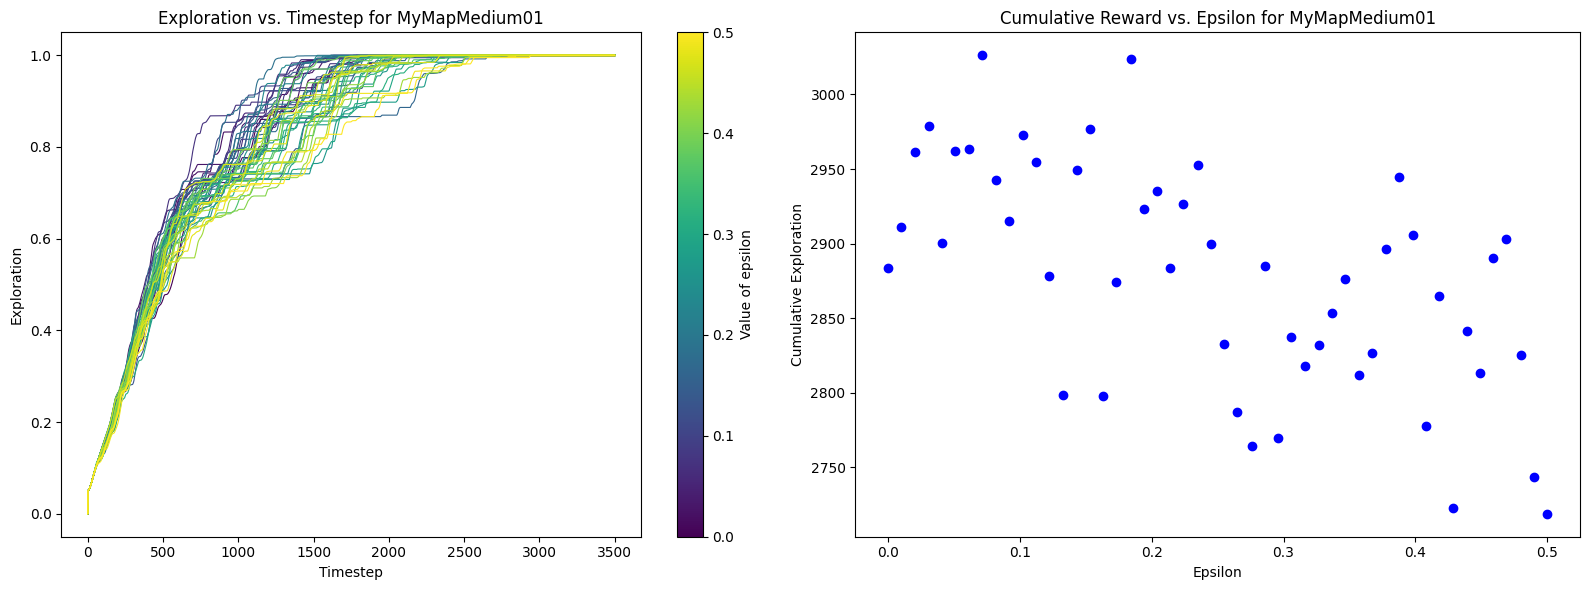

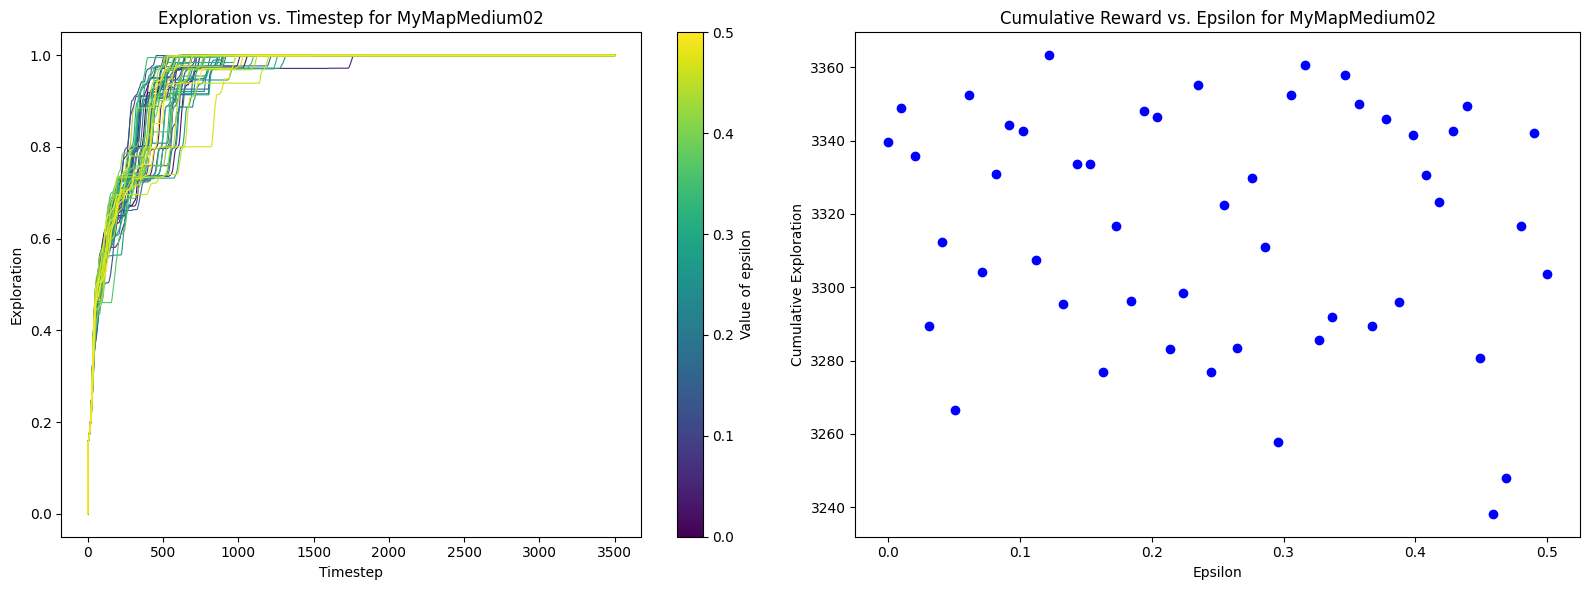

In [39]:
norm = plt.Normalize(min_epsilon, max_epsilon)
cm = plt.cm.viridis

for map_name in data:
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot the exploration in respect to timestep (Left plot)
    ax1.set_title(f"Exploration vs. Timestep for {map_name}")
    for i in range(len(data[map_name])):
        ax1.plot(
            data[map_name][i]["score"], 
            color=cm(norm(data[map_name][i]["info"]["epsilon"])), 
            linewidth=0.8
        )
    sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
    sm.set_array([])  # Required for ScalarMappable
    fig.colorbar(sm, label="Value of epsilon", ax=ax1)
    ax1.set_xlabel("Timestep")
    ax1.set_ylabel("Exploration")
    
    # Plot the cumulative reward as a function of epsilon (Right plot)
    ax2.set_title(f"Cumulative Reward vs. Epsilon for {map_name}")
    cumulative_rewards = [sum(data[map_name][i]["score"]) for i in range(len(data[map_name]))]
    epsilons = [data[map_name][i]["info"]["epsilon"] for i in range(len(data[map_name]))]
    ax2.plot(epsilons, cumulative_rewards, marker="o", linestyle="None", color="blue", linewidth=1.5)
    ax2.set_xlabel("Epsilon")
    ax2.set_ylabel("Cumulative Exploration")
    
    # Adjust layout and show
    plt.tight_layout()
    plt.show()